In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

file_path = 'C:/Users/Preetham/Desktop/customers-100.csv'
data = pd.read_csv(file_path)

print("Columns:", data.columns)

print("First few rows of data:", data.head())

label_encoders = {}
categorical_columns = ['First Name', 'Last Name', 'Company', 'City', 'Country']  # Adjust if necessary based on actual columns

for column in categorical_columns:
    if column in data.columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

if 'Subscription Date' in data.columns:
    data['Subscription Date'] = pd.to_datetime(data['Subscription Date'])
    data['Subscription Days'] = (data['Subscription Date'] - data['Subscription Date'].min()).dt.days
    
    data.drop(columns=['Subscription Date'], inplace=True)
else:
    
    data['Subscription Days'] = 0 

if 'Email' in data.columns:
    data['Email Length'] = data['Email'].apply(len)
    data.drop(columns=['Email'], inplace=True)

if 'Website' in data.columns:
    # Encode Website using its length
    data['Website Length'] = data['Website'].apply(len)
    data.drop(columns=['Website'], inplace=True)

# Encode Phone numbers using their lengths
if 'Phone 1' in data.columns:
    data['Phone 1 Length'] = data['Phone 1'].apply(len)
    data.drop(columns=['Phone 1'], inplace=True)

if 'Phone 2' in data.columns:
    data['Phone 2 Length'] = data['Phone 2'].apply(len)
    data.drop(columns=['Phone 2'], inplace=True)

# Remove any non-numeric columns that might still exist
non_numeric_columns = data.select_dtypes(include=['object']).columns
data.drop(columns=non_numeric_columns, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = [col for col in data.columns if col not in categorical_columns and col != 'Subscription Days']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Processed Data:", data.head())

# Split the data into training and testing sets
X = data.drop(columns=['Subscription Days'])
y = data['Subscription Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:", X_train.head())
print("Training Labels:", y_train.head())
print("Testing Features:", X_test.head())
print("Testing Labels:", y_test.head())


Columns: Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website'],
      dtype='object')
First few rows of data:    Index      Customer Id First Name Last Name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           Company               City  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      Country                 Phone 1                Phone 2  \
0                       Chile            229.077.5154  

Linear Regression MSE: 66824.7566767368
Linear Regression R^2 Score: -0.28214039419819614


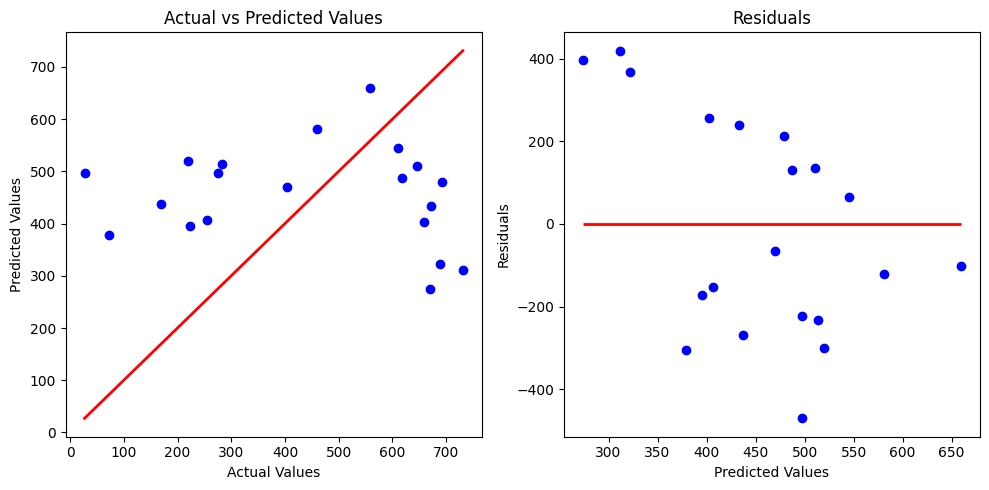

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_lr = linear_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R^2 Score:", r2_lr)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, color='blue')
plt.hlines(0, min(y_pred_lr), max(y_pred_lr), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals')

plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 0.6
Logistic Regression Confusion Matrix:
 [[4 6]
 [2 8]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.57      0.80      0.67        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20



c:\Users\Preetham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


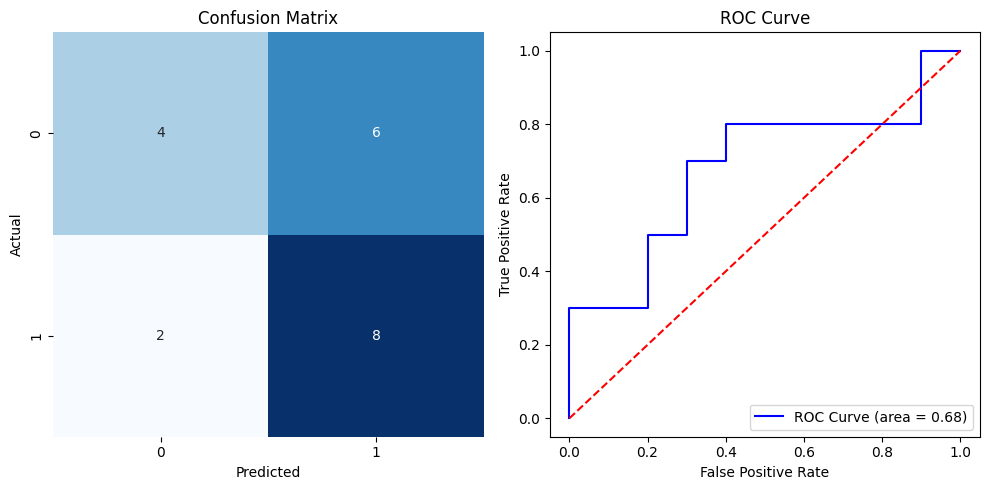

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

y_binary_train = (y_train > y_train.median()).astype(int)
y_binary_test = (y_test > y_test.median()).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_binary_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

accuracy_log_reg = accuracy_score(y_binary_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_binary_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_binary_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("Logistic Regression Classification Report:\n", class_report_log_reg)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

fpr, tpr, _ = roc_curve(y_binary_test, y_pred_prob_log_reg)
roc_auc = roc_auc_score(y_binary_test, y_pred_prob_log_reg)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_binary_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_binary_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_binary_test, y_pred_svm)
class_report_svm = classification_report(y_binary_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", class_report_svm)


SVM Accuracy: 0.5
SVM Confusion Matrix:
 [[6 4]
 [6 4]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.50      0.40      0.44        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20



In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_binary_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_binary_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_binary_test, y_pred_dt)
class_report_dt = classification_report(y_binary_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.6
Decision Tree Confusion Matrix:
 [[7 3]
 [5 5]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_binary_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_binary_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_binary_test, y_pred_rf)
class_report_rf = classification_report(y_binary_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.6
Random Forest Confusion Matrix:
 [[6 4]
 [4 6]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.60      0.60      0.60        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



In [27]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_binary_train)

# Predict on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_binary_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_binary_test, y_pred_nb)
class_report_nb = classification_report(y_binary_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Classification Report:\n", class_report_nb)


Naive Bayes Accuracy: 0.55
Naive Bayes Confusion Matrix:
 [[6 4]
 [5 5]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_binary_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_binary_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_binary_test, y_pred_knn)
class_report_knn = classification_report(y_binary_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", class_report_knn)


KNN Accuracy: 0.7
KNN Confusion Matrix:
 [[7 3]
 [3 7]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



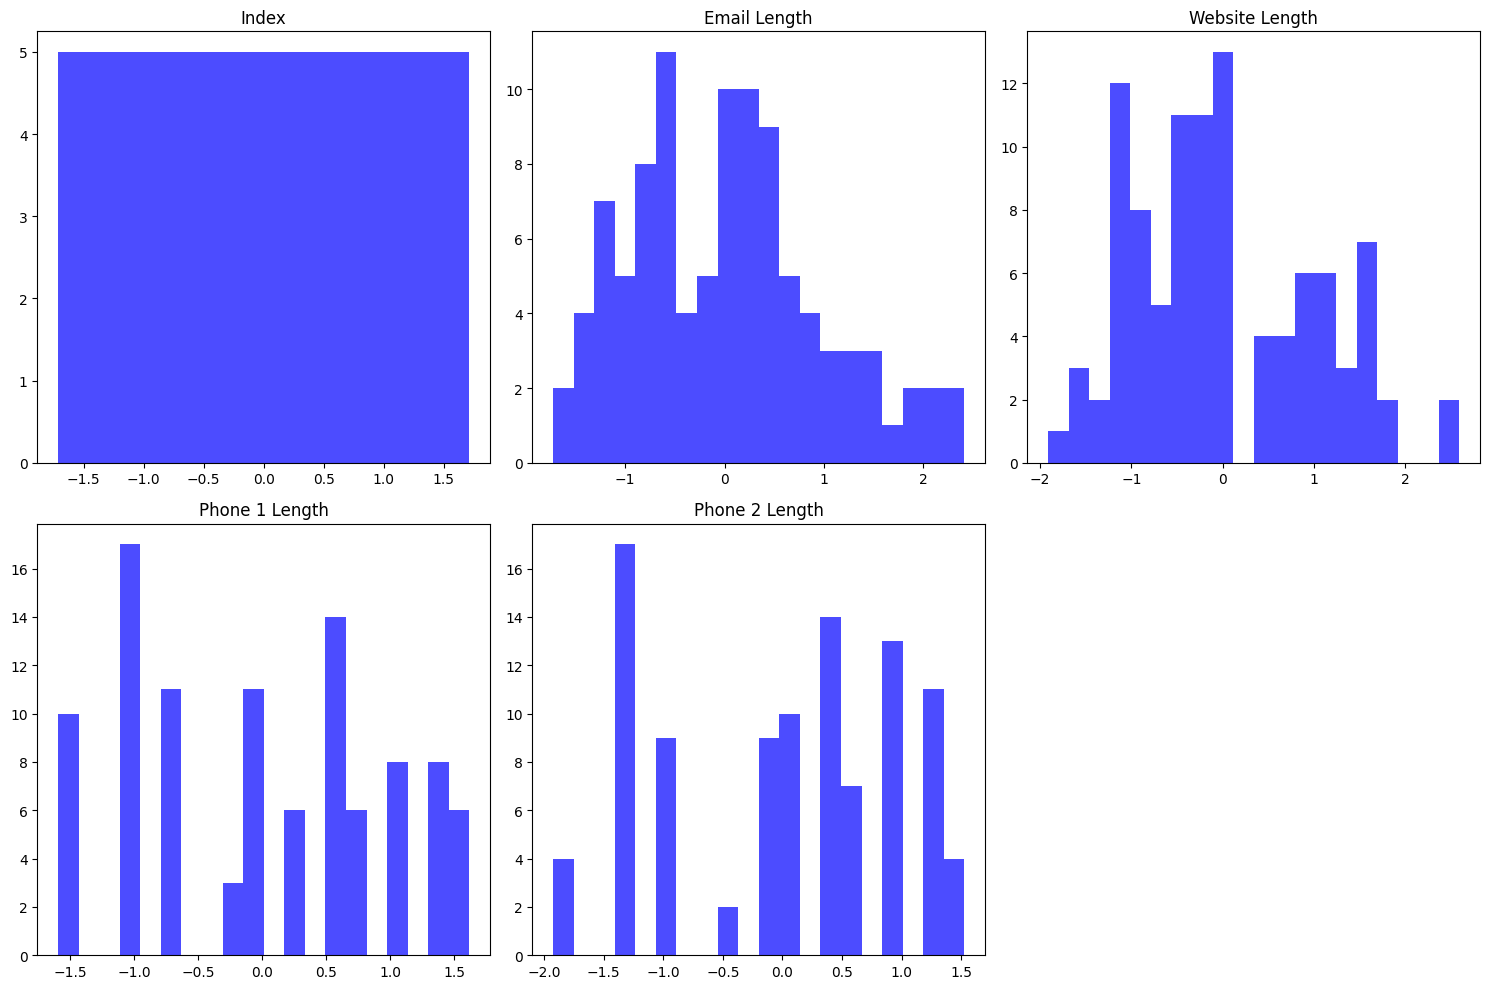

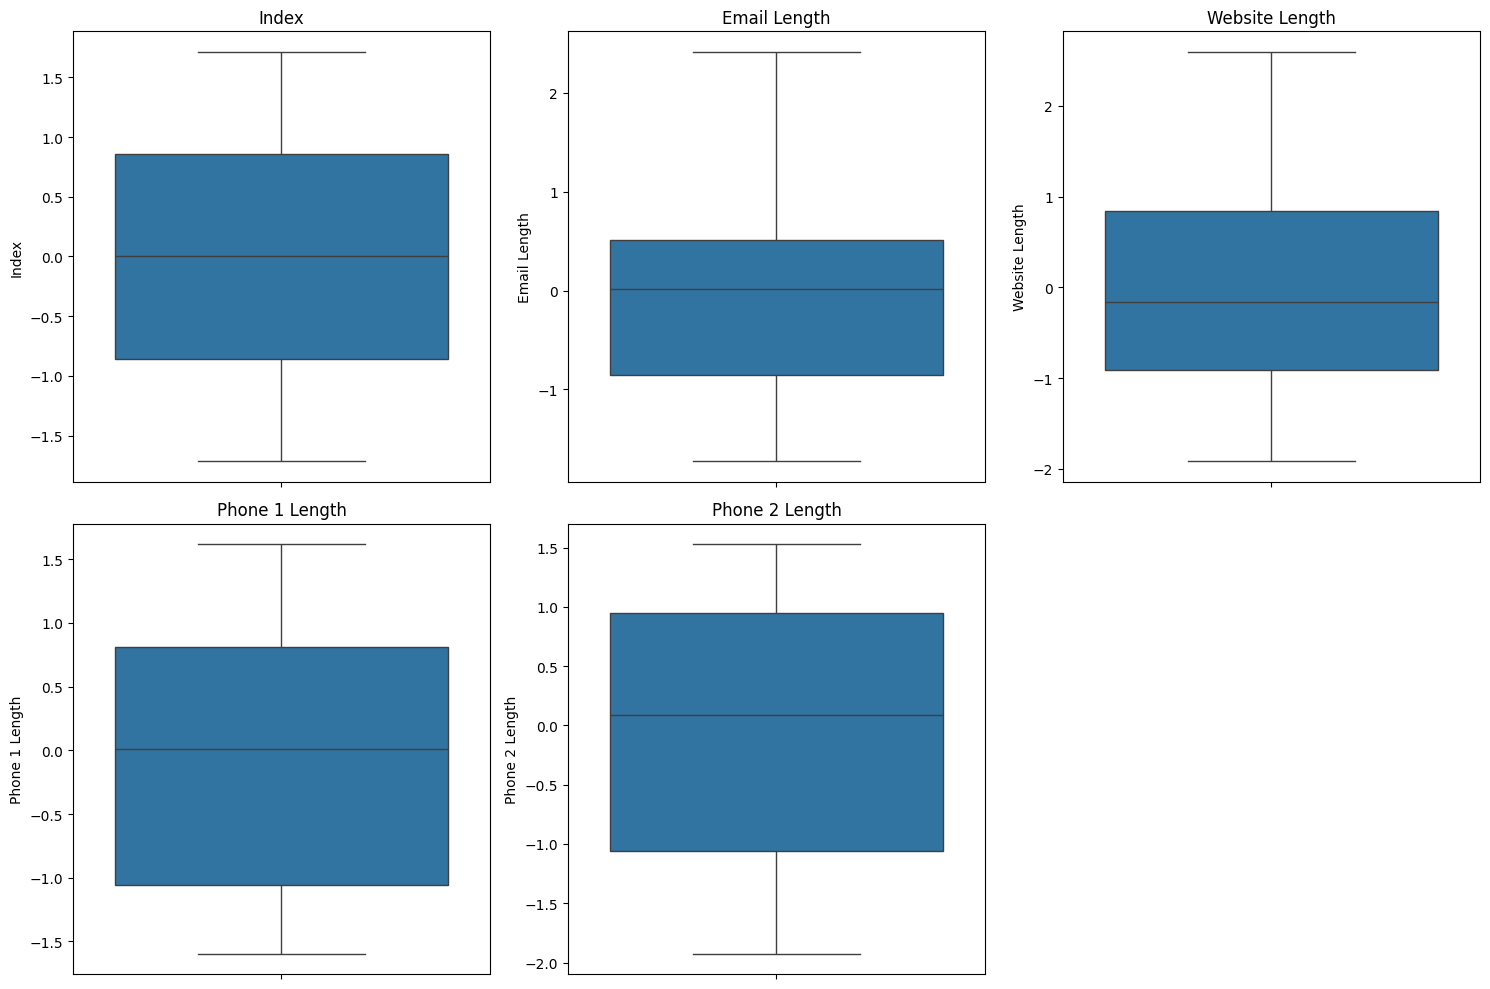

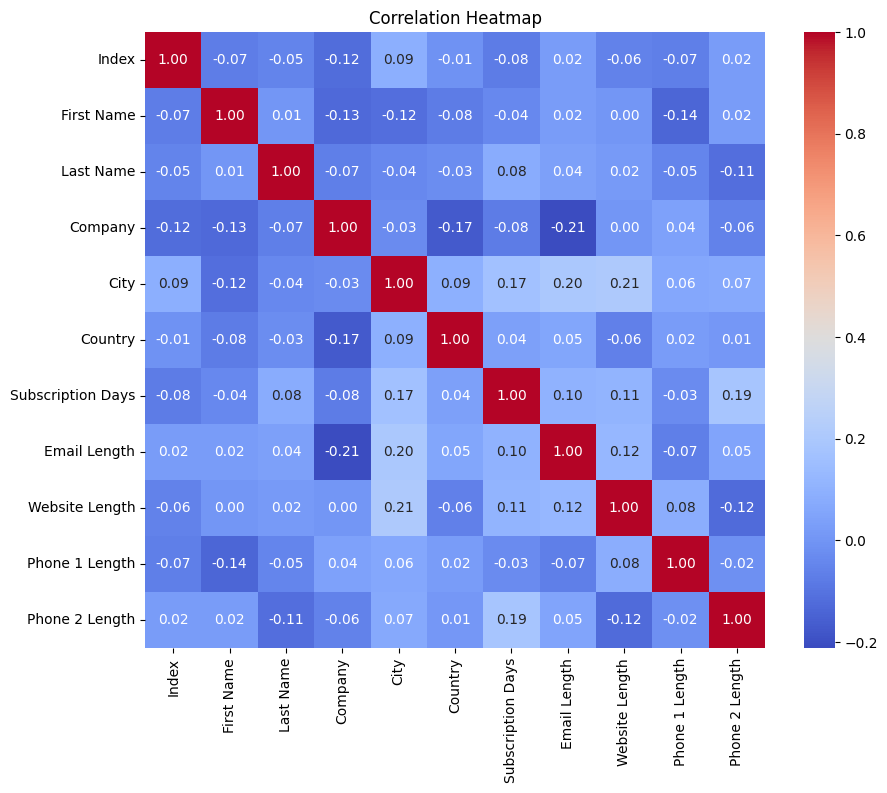

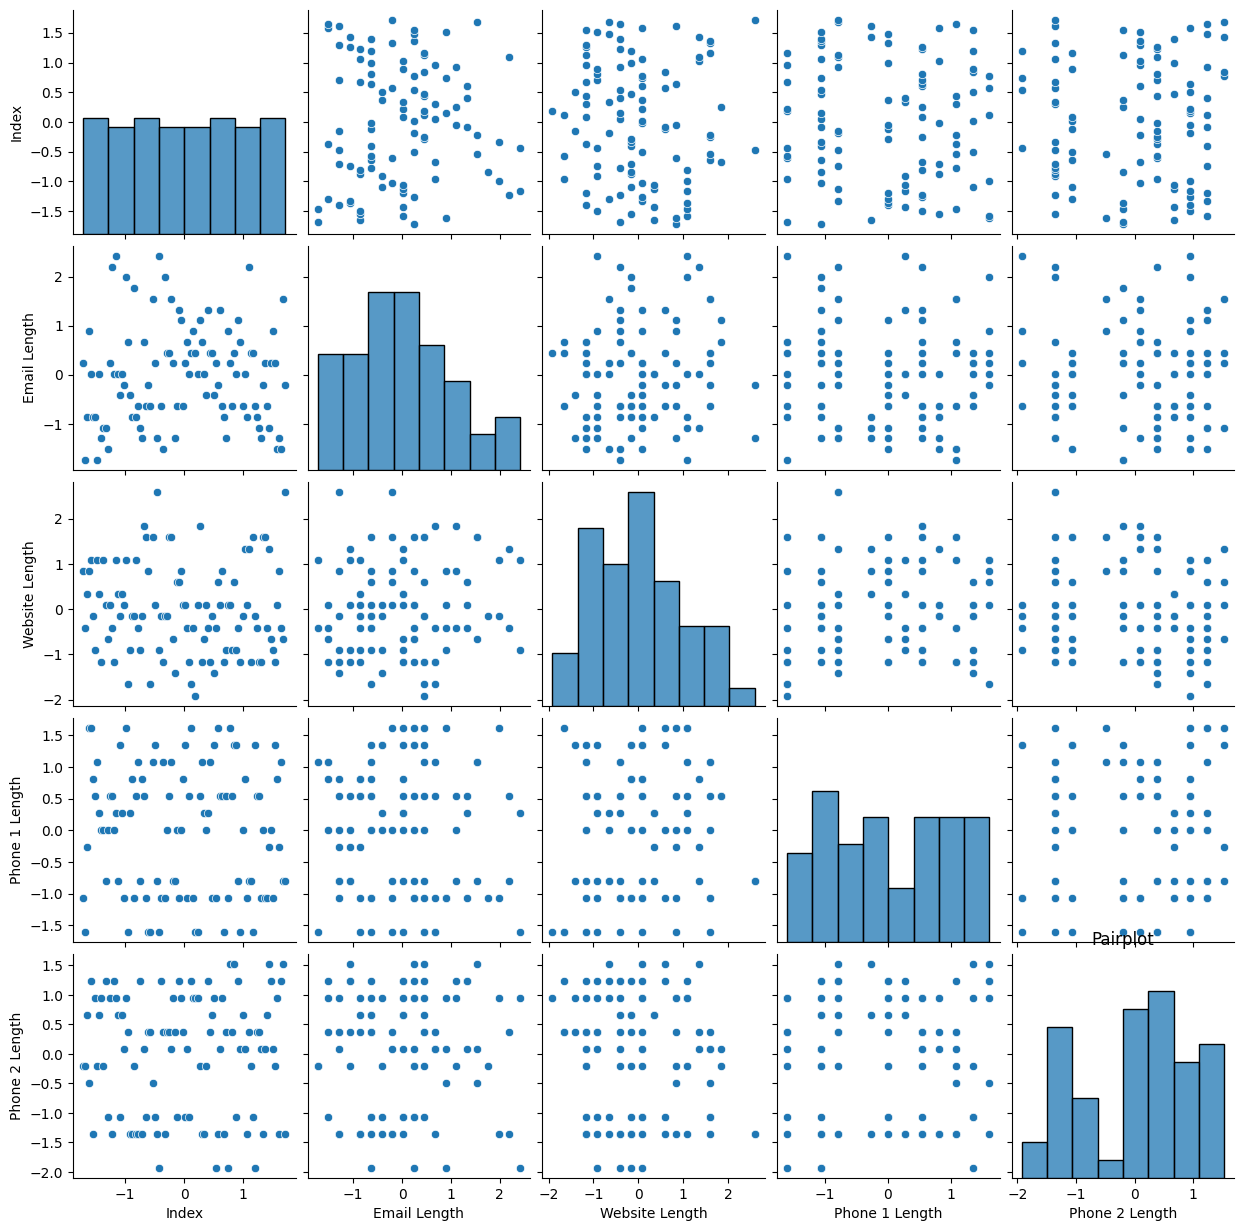

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
def plot_histograms(data, cols, bins=20):
    fig = plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.subplot(len(cols) // 3 + 1, 3, i + 1)
        plt.hist(data[col], bins=bins, color='blue', alpha=0.7)
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Boxplot for numerical features
def plot_boxplots(data, cols):
    fig = plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.subplot(len(cols) // 3 + 1, 3, i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Correlation heatmap
def plot_correlation_heatmap(data):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Pairplot for numerical features
def plot_pairplot(data):
    sns.pairplot(data)
    plt.title('Pairplot')
    plt.show()

# Get numerical columns (excluding target)
numerical_columns = [col for col in data.columns if col not in categorical_columns and col != 'Subscription Days']

# Plot Histograms
plot_histograms(data, numerical_columns)

# Plot Boxplots
plot_boxplots(data, numerical_columns)

# Plot Correlation Heatmap
plot_correlation_heatmap(data)

# Plot Pairplot
plot_pairplot(data[numerical_columns])
